# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Jacob Okhuelegbe Ukokobili</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier

In [98]:
# Read csv
data = pd.read_csv('winequality.csv')
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [99]:
# Size of the dataset
data.shape

(1599, 12)

In [100]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [101]:
# Data Description for integer-valued features.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [102]:
# Split features in groups based on quality
data.groupby(by='quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


# Exploratory Data Analysis

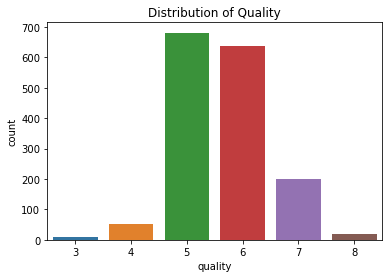

In [103]:
# Our label Distribution (countplot)
sns.countplot(data.quality)
plt.title("Distribution of Quality")
plt.show()

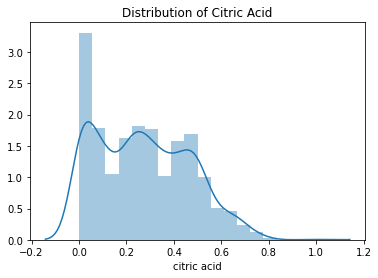

In [104]:
# Example EDA (distplot)
sns.distplot(data['citric acid']);
plt.title('Distribution of Citric Acid')
plt.show()

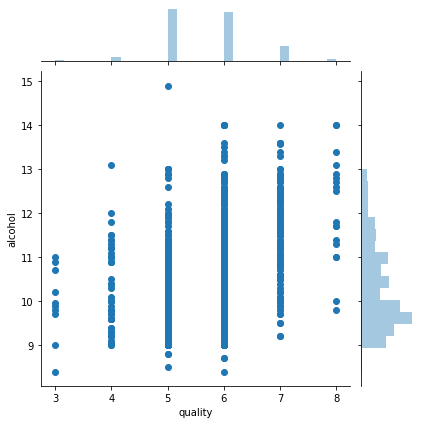

In [105]:
# plotting the alcohol variable against the quality variable.
sns.jointplot(data['quality'], data['alcohol'])
plt.show()

In [106]:
#sns.pairplot(data, hue="quality");

In [107]:
# Correlations between features and the target variable
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


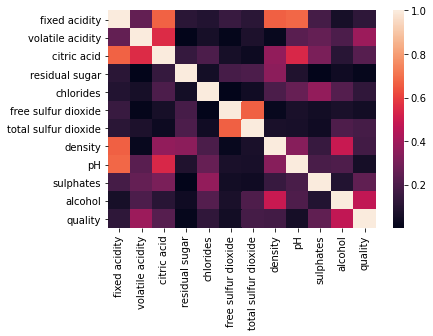

In [108]:
# Visualize the correlation of features that we found above using heatmap
sns.heatmap(np.abs(corr),          # use absolute values
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [109]:
# creating new additional Alcohol into high and low category
data['alcohol_cat'] = None
data.loc[(data['alcohol'] <= 10), 'alcohol_cat'] = 'low'
data.loc[(data['alcohol'] > 10), 'alcohol_cat'] = 'high'

In [110]:
# check if alcohol_cat values have been added to the table 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


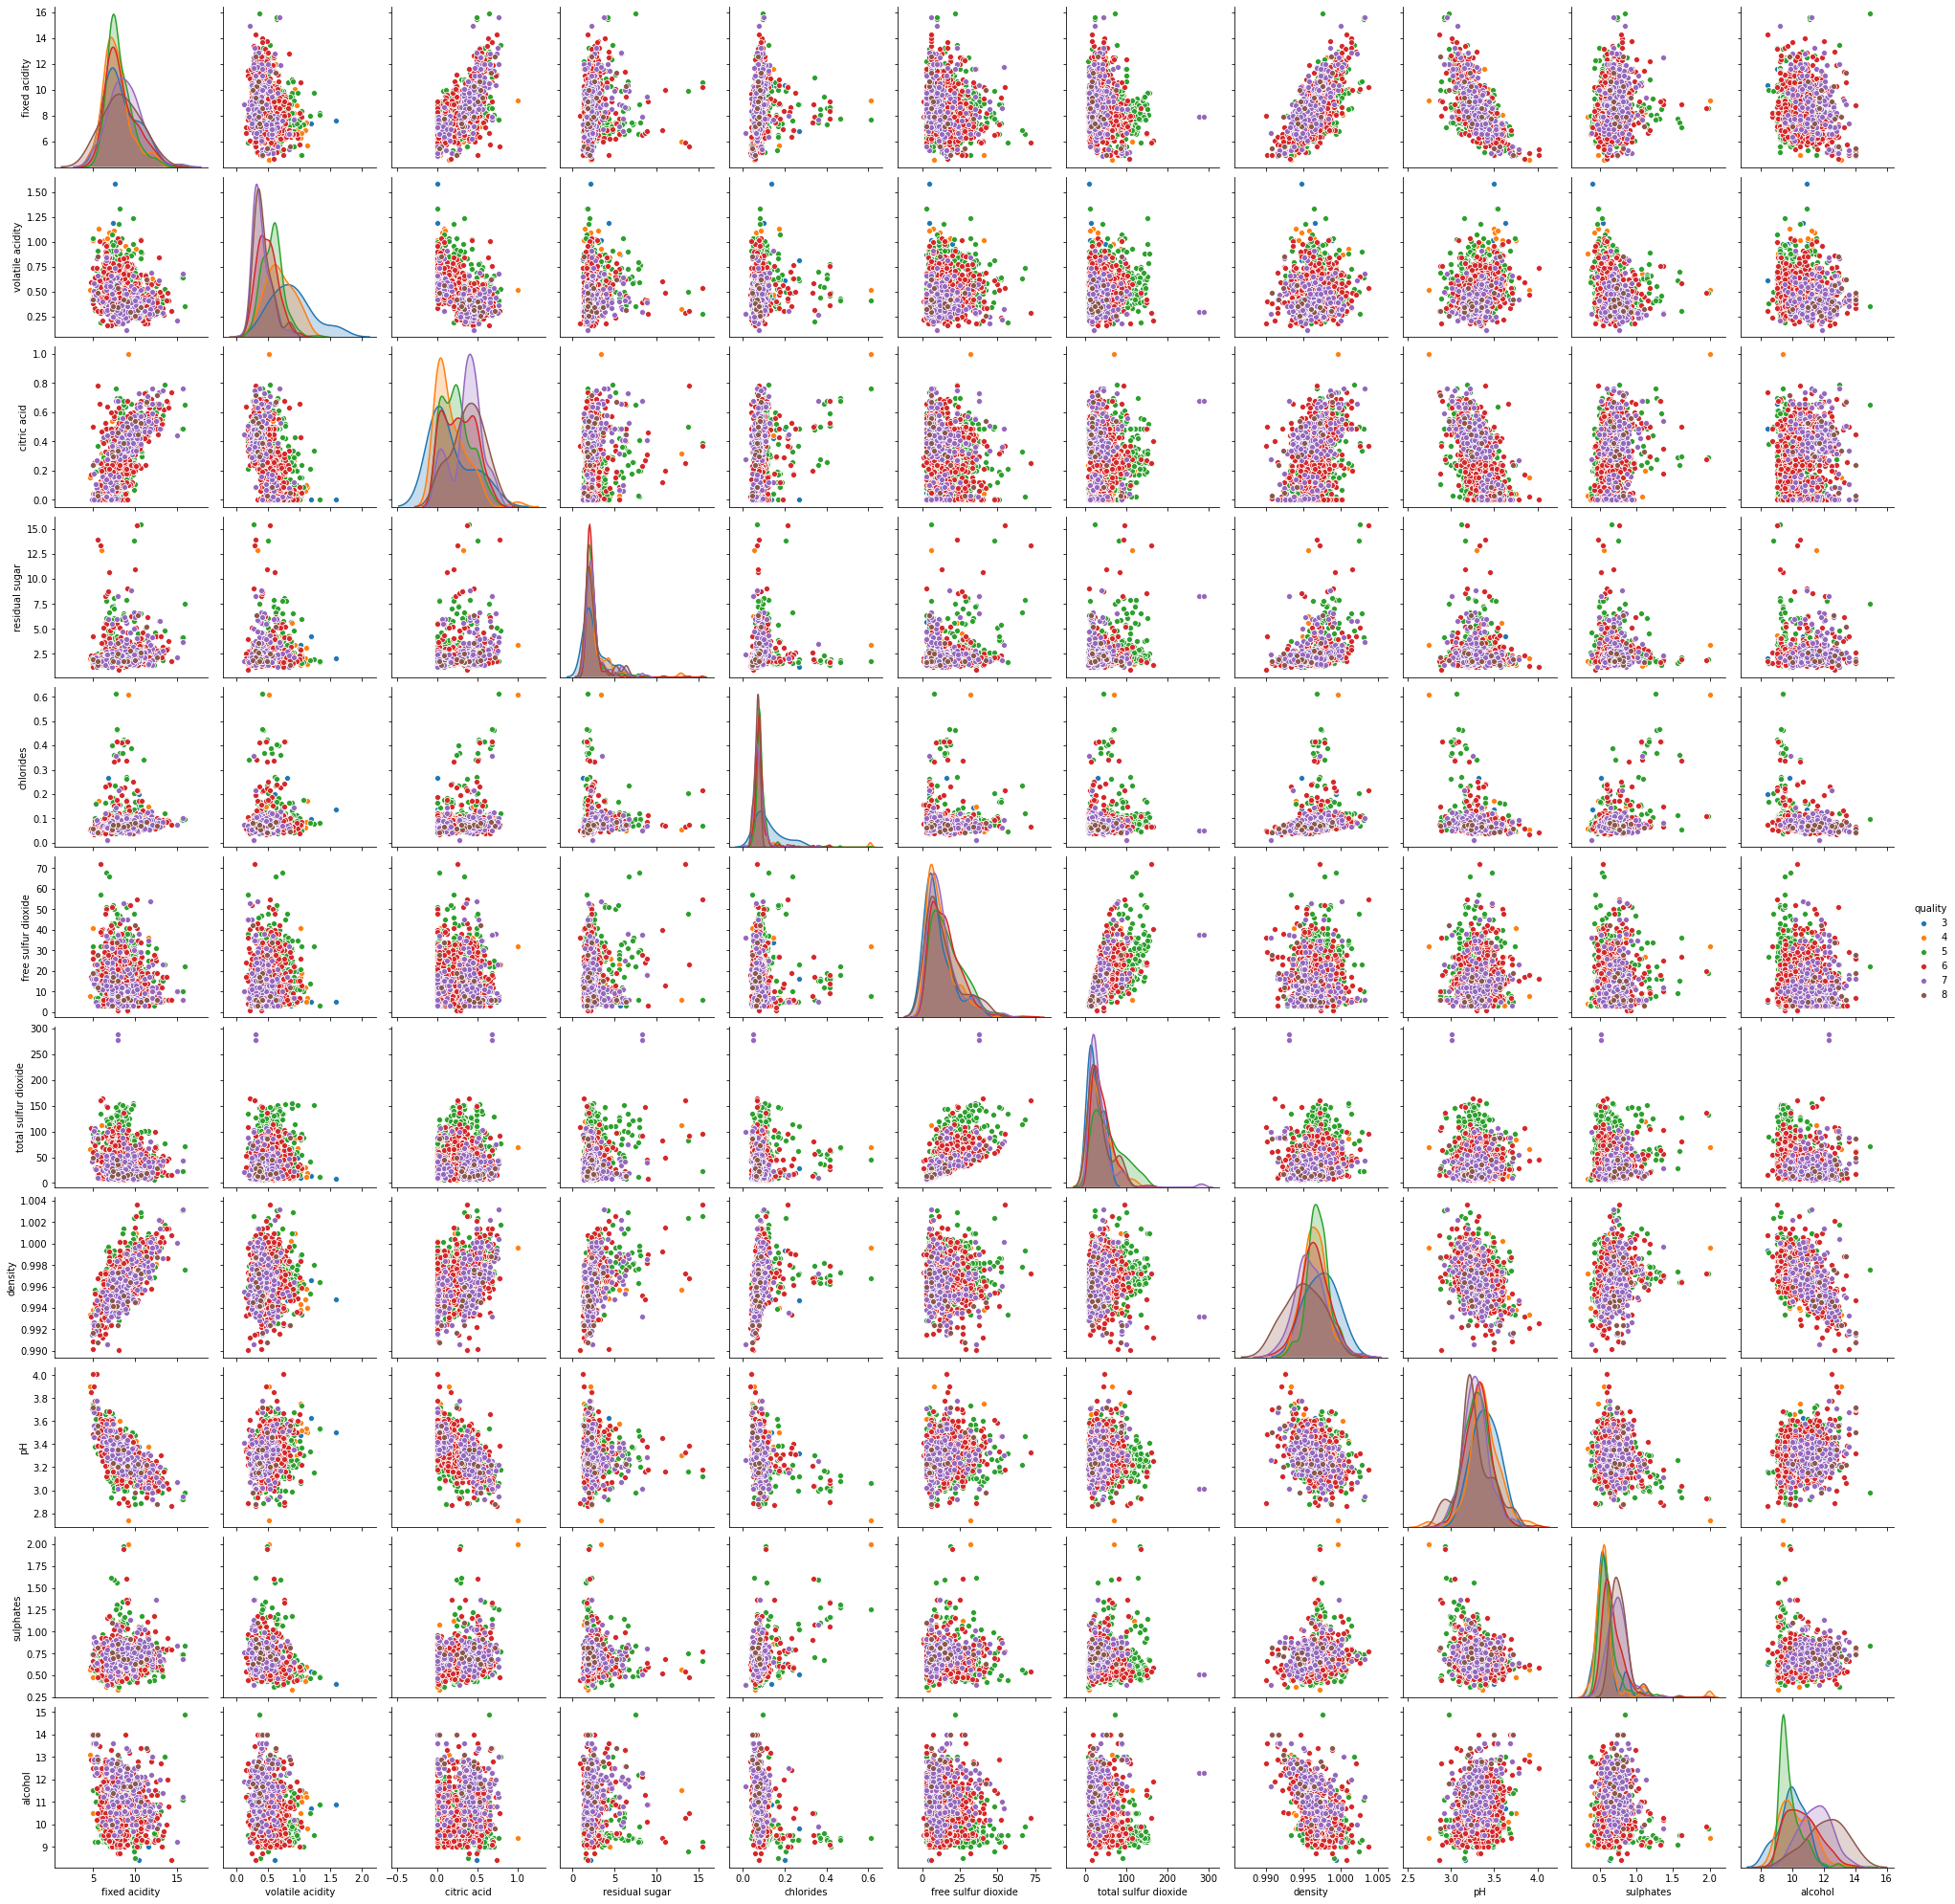

In [135]:
sns.pairplot(data, hue="quality")

# Preprocessing

In [112]:
# Are there any duplicated values?
data.duplicated().any()

True

In [113]:
# drop duplicated values and confirm lenght after dropping the values.
data = data.drop_duplicates()
len(data)

1359

In [114]:
# Data after converting categorical features to integers
# alcohol_cat {low, high} to {0, 1}
data['alcohol_cat'] = data['alcohol_cat'].map( {'high': 1, 'low': 0} ).astype(int)

In [115]:
# creating X and y variables
X = data.drop('quality', 1)
y = data.quality.values

In [116]:
# Do we need to do feature scaling?
# Yes we need to feature scale because there is a huge difference in values present in our numerical dataset.
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

In [117]:
X_scaled.shape, y.shape

((1359, 11), (1359,))

In [118]:
# Do we need to generate new features?
# Yes because our dataset doesn't look sufficient, so we are going to add four new features.
# We will be classifying Alcohol in to two groups

In [119]:
# Split Train and Test dataset. (0.7/0.3)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ML Application
 Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

<h3>Define Model</h3>

In [120]:
svc = SVC()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

<h3>Fit Models</h3>

In [121]:
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

<h3>Evaluate Models For Both train And Test Datasets</h3>

In [122]:
print("Accuracy of train(SVM): {}".format(round(svc.score(X_train,y_train) * 100, 2)))
print("Accuracy of test(SVM): {}".format(round(svc.score(X_test,y_test)* 100, 2)))
print()
print("Accuracy of train(KNN): {}".format(round(knn.score(X_train,y_train) * 100, 2)))
print("Accuracy of test(KNN): {}".format(round(knn.score(X_test,y_test)* 100, 2)))
print()
print("Accuracy of train(Random Forrest): {}".format(round(random_forest.score(X_train,y_train) * 100, 2)))
print("Accuracy of test(Random Forrest): {}".format(round(random_forest.score(X_test,y_test)* 100, 2)))
print()
print("Accuracy of train(Decision Tree): {}".format(round(decision_tree.score(X_train,y_train) * 100, 2)))
print("Accuracy of test(Decision Tree): {}".format(round(decision_tree.score(X_test,y_test)* 100, 2)))

Accuracy of train(SVM): 65.51
Accuracy of test(SVM): 62.99

Accuracy of train(KNN): 68.14
Accuracy of test(KNN): 52.7

Accuracy of train(Random Forrest): 100.0
Accuracy of test(Random Forrest): 63.24

Accuracy of train(Decision Tree): 100.0
Accuracy of test(Decision Tree): 51.23


### Hyper-parameter Tuning

In [37]:
parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [10, 50,100],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [0.001,0.003,0.01],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [True,False],
             }

grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=5)

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_
 
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6067070818407274
Best parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 0.01, 'n_estimators': 100}


In [133]:
parameters = {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 
              'min_samples_split': 0.0001, 'n_estimators': 10000}

model = RandomForestClassifier(**parameters)
    
model.fit(X_train, y_train)
model.fit(X_train, y_train)
train_accuracy = round(model.score(X_train, y_train) * 100, 2)
Y_pred = model.predict(X_test)
print(train_accuracy)

96.32


In [134]:
model.score(X_test, y_test) 

0.6274509803921569

<h3>Confusion Matrix And Scores Of Accuracy, Recall, Precision And F1-Score
</h3>

In [127]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.69      0.73      0.71       172
           6       0.57      0.70      0.63       164
           7       0.65      0.34      0.45        50
           8       0.00      0.00      0.00         4

    accuracy                           0.63       408
   macro avg       0.32      0.29      0.30       408
weighted avg       0.60      0.63      0.61       408



C:\Users\JACOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.31983636129364773
Recall = 0.294613348459066
Accuracy = 0.6299019607843137
F1 Score = 0.29788866689766863


C:\Users\JACOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install xgboost

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.